In [111]:
import time
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as mx
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [151]:
# data = pd.read_excel(r'Clean3d_master_dataset.xlsx')
data = pd.read_excel(r'TinCleanData.xlsx')

In [138]:
# Uncomment this whole block to remove boundaries from the input data

# indices = data[ data['x/L'] == 0 ].index
# data = data.drop(indices, axis=0)
# indices = data[ data['x/L'] == 1 ].index
# data = data.drop(indices, axis=0)
# indices = data[ data['y/L'] == 0 ].index
# data = data.drop(indices, axis=0)
# indices = data[ data['y/L'] == 1 ].index
# data = data.drop(indices, axis=0)
# indices = data[ data['z/L'] == 0 ].index
# data = data.drop(indices, axis=0)
# indices = data[ data['z/L'] == 1 ].index
# data = data.drop(indices, axis=0)
# data.shape

In [152]:
# Comment this block and uncomment niche wala to predict one single point

x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'T_back', 'T_front', 'Time (s)', 'Alpha', 'x/L', 'y/L', 'z/L']]
y = data['Temperature']

In [153]:
# Uncomment this block and comment upar wala to predict one single point

# inp = [500, 100, 400, 0, 400, 100, 0.03, 0.000111, 0.8, 0.2, 0.6]
# x = np.array(inp).reshape(1, 11)
# x = pd.DataFrame(x,
#              columns=['T_left', 'T_right', 'T_bottom', 'T_top', 'T_back', 'T_front', 'Time (s)', 'Alpha', 'x/L', 'y/L', 'z/L'],
#              index=[1])
# x = x.astype({"T_left":'int64', "T_right":'int64', "T_bottom":'int64', "T_top":'int64', "T_back":'int64', "T_front":'int64'})

In [1]:
# Loads the fitted model from a file
# fitted with n_est 1000, max_depth 12
with open('model3dn1000md12.pkl', 'rb') as input:
    rf = pickle.load(input)

NameError: name 'pickle' is not defined

In [156]:
begin = time.time()
predicted = rf.predict(x)
print("Time taken to predict:", np.round(1000*(time.time() - begin), 2), "ms or", np.round(time.time() - begin, 2), "s.")
# prediction[:10] # first 10 values

Time taken to predict: 410.87 ms or 0.41 s.


In [162]:
# This block is for falsifying predicted values
outputs = pd.DataFrame({'Actual': y, 'Predicted': predicted})
print(outputs.shape)

min_error = 2  # in deg C
# This drops all entries where error is greater than min_error
indices = outputs[ abs(outputs['Actual']-outputs['Predicted']) > 2 ].index
outputs = outputs.drop(indices, axis=0)
print(outputs.shape)

# This drops all entries which are boundary values
# indices = outputs[ abs(outputs['Actual']-outputs['Predicted']) == 0.0 ].index
# outputs = outputs.drop(indices, axis=0)
# print(outputs.shape)

(8316, 2)
(114, 2)


R2 Score:  78.0 %
RMSE:  67.68


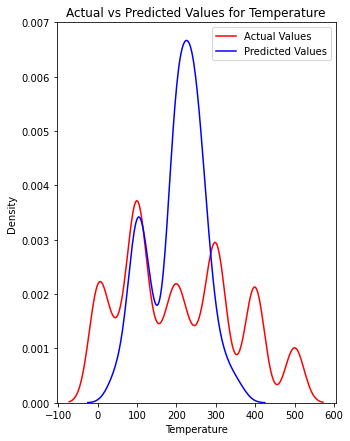

In [164]:
print("R2 Score: ", 100*np.round(mx.r2_score(y, predicted), 2), "%")
print("RMSE: ", np.round(mx.mean_squared_error(y, predicted, squared=False), 2))

plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(outputs, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Predicted Values for Temperature')
plt.legend()
plt.show()